# Introducción

El objetivo de esta práctica es mostrar al alumno las posibilidades que ofrece R para analizar datos de distintas fuentes diferentes, extraer datos, comparar, hacer gráficas y sacar estadísticos.

Las fuentes de datos que se tienen son:
* Datos meteorológicos de Praga de 1775 hasta 2004: https://www.ncdc.noaa.gov/cdo-web/datasets
* Banco mundial: https://data.worldbank.org/topic/climate-change
* Nivel de CO2 en la atmósfera (Mauna Loa): https://www.esrl.noaa.gov/gmd/ccgg/trends/data.html

Todos los ficheros necesarios para resolver la práctica se ofrecen como adjuntos.

## Datos meteorológicos NOAA

Carga el tiempo meteorológico de Praga en un data.frame. Fichero: *EZE00100082*

In [1]:
weatherPraga<-read.csv("./datos/EZE00100082.csv", sep = ",")

Mostrar los 10 años que más precipitiaciones han tenido junto con su valor correspondiente (columna PRCP):

In [2]:
#Ordenanamos el Dataset por las precipitaciones
weatherPragaOrdenadoPRCP <- weatherPraga[order(weatherPraga$PRCP, decreasing = TRUE),]

#Cogemos los 10 primeros y sólo las columnas DATE y PRCP
wPraga10Primeros <- subset(weatherPragaOrdenadoPRCP[1:10,],select = c(DATE,PRCP))

#Mostramos
wPraga10Primeros



,DATE,PRCP
165,1939,745.5
54,1828,665.4
228,2002,661.5
172,1946,638.3
116,1890,637.3
63,1837,634.9
184,1958,633.1
57,1831,625.7
192,1966,624.1
55,1829,622.4


* Muestra en un diagrama de dispersión la temperatura mínima registrada en un año (columna EMNT) en función del año registrado (columna DATE).
* Crear una regresión lineal (polinomio orden 1) que muestre la tendencia. Pintarla sobre el diagrama de dispersión.
* En media, ¿Cuantos grados ha aumentado la temperatura mínima cada año? (pendiente de la  regresión lineal)

In [7]:
#Cargamos la libreria
library("ggplot2")
options(repr.plot.height=4,repr.plot.width=6)

In [33]:
#Regresion lineal

reg <- lm(DATE ~ EMNT, data = weatherPraga)


In [34]:
sp <- ggplot(data=weatherPraga, aes(x=DATE, y=EMNT)) + geom_point()

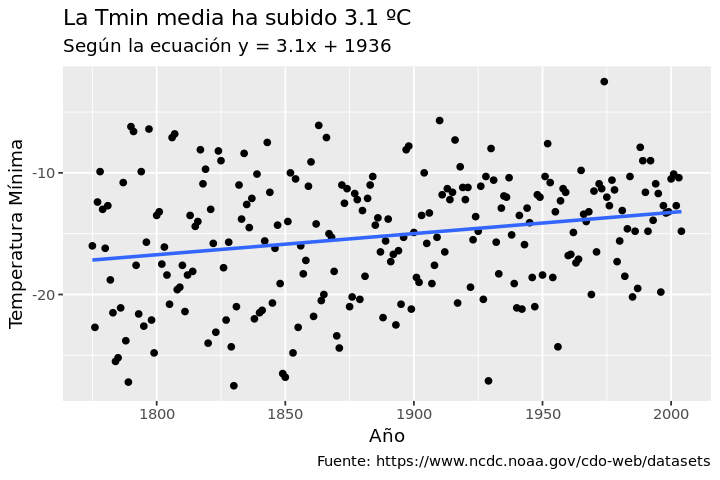

In [47]:
coeff=coefficients(reg)

# Ecuacion de la recta :
m = coeff[2]
b = coeff[1]

eq = paste0("y = ", round(m,1), "x + ", round(b,1))

sp + geom_smooth(method = "lm", se = FALSE) + ggtitle(eq) +
  labs(title = paste("La T min media ha subido", round(m,1),"ºC"),
       subtitle = paste("Según la ecuación",eq),
       caption = "Fuente: https://www.ncdc.noaa.gov/cdo-web/datasets", 
       x = "Año", y = "Temperatura Mínima")


¿Ha subido realmente la temperatura mínima?
* Calcula la media de la temperatura mínima (columna EMNT) del intervalo de años [1775,1794]
* Calcula la media de la temperatura mínima (columna EMNT) del intervalo de años [1985,2004]
* ¿Cual es la diferencia entre ambos? ¿Es estadísticamente significativa?
  * Nota: antes de aplicar un test estadístico hay que ver si cumple con los requisitos de ese test.

In [90]:
intAntiguo <- seq(1775, to=1794)
intModerno <- seq(1985, to=2004)

ed <- subset(weatherPraga, select = c("DATE","EMNT"))


dfA <- ed[ed$DATE %in% intAntiguo,]
dfM <- ed[ed$DATE %in% intModerno,]

paste0("La media de la temperatura media de 1775 a 1794 fue de ", mean(dfA$EMNT),
       " ºC. Mientras que de 1985 a 2004 fue ", mean(dfM$EMNT), " ºC")
paste0("La diferencia de las medias fue ", mean(dfA$EMNT)-mean(dfM$EMNT)," ºC")


[1] "La media de la temperatura media de 1775 a 1794 fue de -16.935 ºC. Mientras que de 1985 a 2004 fue -13.04 ºC"

[1] "La diferencia de las medias fue -3.895 ºC"

Los grupos estan correlados, ya que provienen de la misma ciudad. 

Como queremos comparar las medias parecería que tendriamos que usar un test t-Student emparejado, pero antes de realizarlo debemos comprobar si los datos que tenemos son "normales", realizando un test shapiro.

In [109]:
shapiro.test(dfA$EMNT)
shapiro.test(dfM$EMNT)



	Shapiro-Wilk normality test

data:  dfA$EMNT
W = 0.95089, p-value = 0.3808



	Shapiro-Wilk normality test

data:  dfM$EMNT
W = 0.91373, p-value = 0.0751


Para un p<0.05, aceptamos la hipotesis nula, es decir, tanto dfA$EMNT como dfM$EMNT son distribuciones normales.

Una vez establecemos esto, pasamos a realizar el test t-student emparejado.

In [114]:
t.test(dfA$EMNT,dfM$EMNT,paired = TRUE)


	Paired t-test

data:  dfA$EMNT and dfM$EMNT
t = -2.4797, df = 19, p-value = 0.02269
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -7.1826393 -0.6073607
sample estimates:
mean of the differences 
                 -3.895 


Es decir, rechazamos la hipotesis nula y podemos decir que las medias de las dos medidas **NO** es la misma de forma estadisticamnete significativa.

## Datos banco mundial

Carga los datos del banco mundial

In [116]:
databank<-read.csv("./datos/API_19_DS2_en_csv_v2.csv",skip=4)
#Borramos las X del nombre de la columna
colnames(databank)<-gsub("X","",colnames(databank))

countryData<-read.csv("./datos/Metadata_Country_API_19_DS2_en_csv_v2.csv")

# De esta forma podremos aceder a la información de paises usando su countryCode
rownames(countryData)<-countryData$Country.Code

realCountryData<-subset(countryData,IncomeGroup!="")
regionData<-subset(countryData,IncomeGroup=="")
print(paste("Tenemos un total de",nrow(realCountryData),"paises"))
print(paste("Tenemos un total de",nrow(regionData),"regiones"))
indicators<-read.csv("./datos/Metadata_Indicator_API_19_DS2_en_csv_v2.csv")
print(paste("Tenemos un total de",nrow(indicators),"indicadores"))

[1] "Tenemos un total de 217 paises"
[1] "Tenemos un total de 46 regiones"
[1] "Tenemos un total de 80 indicadores"


¿Cual fue el país que más toneladas de CO2 equivalente emitió en 1970 (Mostrar *Country.Name*)?
¿Cuanto contaminó?

Hay una dataframe con la lista de pasises en *realCountryData*
El número de toneladas de CO2 equivalente viene dado por el Indicator.Code *"EN.ATM.GHGT.KT.CE"*


In [136]:
head(databank)


Country.Name,Country.Code,Indicator.Name,Indicator.Code,1960,1961,1962,1963,1964,1965,⋯,2009,2010,2011,2012,2013,2014,2015,2016,2017,
Aruba,ABW,Urban population (% of total),SP.URB.TOTL.IN.ZS,50.776000,50.761000,50.746000,5.073000e+01,5.071500e+01,5.070000e+01,⋯,4.342100e+01,4.305900e+01,4.269800e+01,4.236400e+01,4.205800e+01,4.177900e+01,4.152800e+01,4.130400e+01,NA,NA
Aruba,ABW,Urban population,SP.URB.TOTL,27526.000000,28141.000000,28532.000000,2.876100e+04,2.892400e+04,2.908200e+04,⋯,4.405200e+04,4.377800e+04,4.357500e+04,4.345600e+04,4.339800e+04,4.336500e+04,4.333100e+04,4.329600e+04,NA,NA
Aruba,ABW,Urban population growth (annual %),SP.URB.GROW,3.117931,2.209658,1.379868,7.994038e-01,5.651398e-01,5.447726e-01,⋯,-7.305493e-01,-6.239346e-01,-4.647817e-01,-2.734659e-01,-1.335575e-01,-7.606930e-02,-7.843500e-02,-8.080622e-02,NA,NA
Aruba,ABW,"Population, total",SP.POP.TOTL,54211.000000,55438.000000,56225.000000,5.669500e+04,5.703200e+04,5.736000e+04,⋯,1.014530e+05,1.016690e+05,1.020530e+05,1.025770e+05,1.031870e+05,1.037950e+05,1.043410e+05,1.048220e+05,NA,NA
Aruba,ABW,Population growth (annual %),SP.POP.GROW,3.148037,2.238144,1.409622,8.324526e-01,5.926490e-01,5.734682e-01,⋯,9.861642e-02,2.126801e-01,3.769848e-01,5.121450e-01,5.929140e-01,5.874924e-01,5.246582e-01,4.599292e-01,NA,NA
Aruba,ABW,Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population),SI.POV.DDAY,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [146]:
# Tomamos sólo los valores de emisiones CO2 equivalentes

df1 <- subset(databank, Indicator.Code == "EN.ATM.GHGT.KT.CE")

In [147]:
# Filtramos sólo los paises

df1 <- df1[df1$Country.Code %in% realCountryData$Country.Code,]

In [153]:
#ordenamos por el valor en 1970
df1_sort <- df1[order(df1$"1970", decreasing = TRUE),]

#mostramos el primero
df1_sort[1,c("Country.Name","Country.Code","Indicator.Name","Indicator.Code","1970")]

,Country.Name,Country.Code,Indicator.Name,Indicator.Code,1970
19959,United States,USA,Total greenhouse gas emissions (kt of CO2 equivalent),EN.ATM.GHGT.KT.CE,5400504


¿Cuales fueron los 5 países que más toneladas de CO2 equivalente emitieron en 2012? ¿Cuantas kt emitieron?

In [156]:
df1_sort_2012 <- df1[order(df1$"2012", decreasing = TRUE),]
df1_sort_2012[c(1,2,3,4,5), c("Country.Name","Country.Code","Indicator.Name","Indicator.Code","2012")]

,Country.Name,Country.Code,Indicator.Name,Indicator.Code,2012
3079,China,CHN,Total greenhouse gas emissions (kt of CO2 equivalent),EN.ATM.GHGT.KT.CE,12454711
19959,United States,USA,Total greenhouse gas emissions (kt of CO2 equivalent),EN.ATM.GHGT.KT.CE,6343841
8599,India,IND,Total greenhouse gas emissions (kt of CO2 equivalent),EN.ATM.GHGT.KT.CE,3002895
2199,Brazil,BRA,Total greenhouse gas emissions (kt of CO2 equivalent),EN.ATM.GHGT.KT.CE,2989418
16039,Russian Federation,RUS,Total greenhouse gas emissions (kt of CO2 equivalent),EN.ATM.GHGT.KT.CE,2803398


¿Cual ha sido la media del **porcentaje** de crecimiento de las emisiones de CO2 equivalente en China desde 2000 hasta 2012?

In [179]:
dfChina <- subset(df1, Country.Code == "CHN")
intAnyos <- seq (2000, to=2012)
dfChina <- dfChina[1,as.character(intAnyos)]



In [183]:
tasaDeCrecimiento <- (dfChina$"2012" / dfChina$"2000")^(1/(ncol(dfChina)))-1
paste("La media del porcentaje de crecimiento ha sido", round(tasaDeCrecimiento*100,2), "%")


[1] "La media del porcentaje de crecimiento ha sido 7.14 %"

Compara las emisiones de CO2(kt) per cápita (clave en Indicator.Code: *EN.ATM.CO2E.PC*) de todos los paises en 1960,1990 y 2014 mediante:
* diagrama de cajas
* histograma
* curvas de densidad

In [187]:
df2 <- subset(databank, Indicator.Code == "EN.ATM.CO2E.PC")
df2 <- df2[,c("Country.Code", "Country.Name","Indicator.Code","1960","1990","2014")]
df2 <- df2[df2$Country.Code %in% realCountryData$Country.Code,]

In [ ]:
#Cargamos la libreria
library("ggplot2")
options(repr.plot.height=4,repr.plot.width=6)


In [188]:
head(df2)

,Country.Code,Country.Name,Indicator.Code,1960,1990,2014
46,ABW,Aruba,EN.ATM.CO2E.PC,NA,26.3745032,8.408363
126,AFG,Afghanistan,EN.ATM.CO2E.PC,0.0460599,0.2134498,0.299445
206,AGO,Angola,EN.ATM.CO2E.PC,0.0974716,0.4202843,1.291328
286,ALB,Albania,EN.ATM.CO2E.PC,1.2581949,1.6781067,1.978763
366,AND,Andorra,EN.ATM.CO2E.PC,NA,7.4673357,5.832170
526,ARE,United Arab Emirates,EN.ATM.CO2E.PC,0.1187577,27.9592452,23.302023


In [224]:
#transformamos el Dataframe
library( reshape2 )
dfParaGrafico <- df2[,c("Country.Name","1960","1990","2014")]
dfParaGrafico <- melt(dfParaGrafico)
#quitamos NA
dfParaGrafico <- dfParaGrafico[complete.cases(dfParaGrafico),]
names(dfParaGrafico) <- c("Pais", "Año", "CO2")



Using Country.Name as id variables


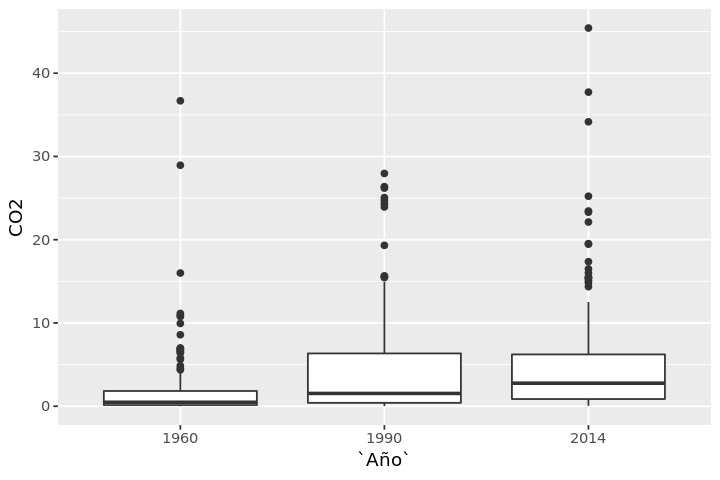

In [225]:
#Boxplot
ggplot(data=dfParaGrafico, aes(x=Año, y=CO2))+geom_boxplot()

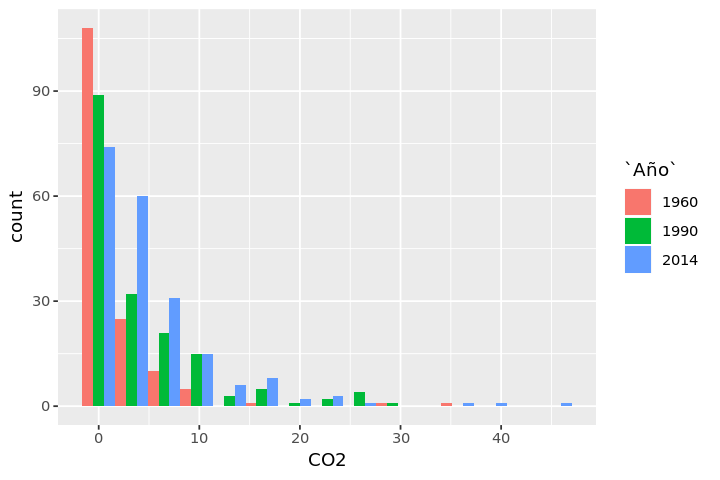

In [227]:
#Histograma
ggplot(data = dfParaGrafico, aes(x=CO2, fill=Año)) +
    geom_histogram(bins=15, position="dodge")


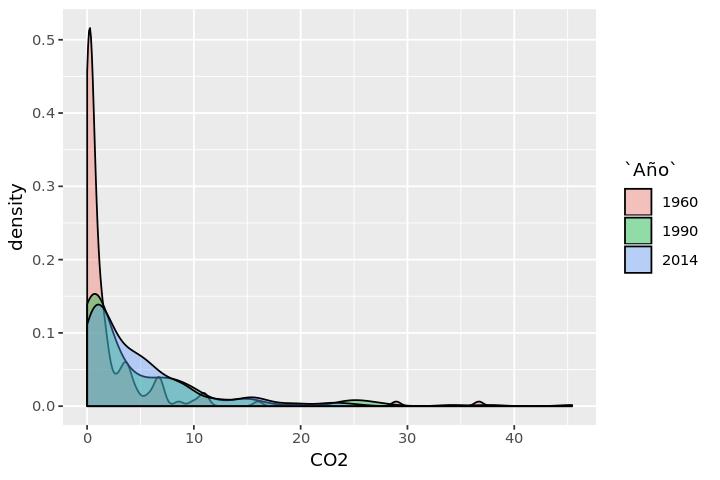

In [230]:
#curvas de densidad
ggplot(dfParaGrafico, aes(x=CO2, fill=Año)) +
  geom_density(alpha=0.4)

Utilizando ggplot: Compara en una gráfica las emisiones totales de CO2 (clave en Indicator.Code: EN.ATM.CO2E.KT) en función del año de las siguientes regiones:
* Mundo entero: WLD
* Unión europea: EUU
* Africa subsahariana: SSA
* Norteamérica: NAC
* Este de Asia y pacífico: TEA

Ayuda: Tendrás que usar la función *melt()* para transformar los años, cada año en una columna, en un data.frame donde cada uno esté en una fila.

In [250]:
colDeseado <- c("WLD", "EUU", "SSA", "NAC", "TEA")
dfEmisionesTotales <- subset(databank, Indicator.Code == "EN.ATM.CO2E.KT")
dfEmisionesTotales <- subset(dfEmisionesTotales, Country.Code %in% colDeseado)
head(dfEmisionesTotales)


,Country.Name,Country.Code,Indicator.Name,Indicator.Code,1960,1961,1962,1963,1964,1965,⋯,2009,2010,2011,2012,2013,2014,2015,2016,2017,
5729,European Union,EUU,CO2 emissions (kt),EN.ATM.CO2E.KT,2359594.9,2445945.7,2587255.9,2763661.3,2879590.4,2977005.8,⋯,3601566.1,3709775.6,3568090.0,3494156.0,3421472,3241844.4,NA,NA,NA,NA
13489,North America,NAC,CO2 emissions (kt),EN.ATM.CO2E.KT,3083749.0,3074863.8,3194551.1,3330490.4,3493998.3,3643256.2,⋯,5800746.6,5930811.4,5827237.0,5637370.8,5676780,5792048.5,NA,NA,NA,NA
17089,Sub-Saharan Africa (excluding high income),SSA,CO2 emissions (kt),EN.ATM.CO2E.KT,126081.5,131873.2,136498.0,143101.0,157076.8,174349.5,⋯,743470.8,746169.8,757439.6,767113.7,783708,822325.7,NA,NA,NA,NA
18289,East Asia & Pacific (IDA & IBRD countries),TEA,CO2 emissions (kt),EN.ATM.CO2E.KT,840235.7,613891.6,502163.8,499241.1,506014.7,550367.1,⋯,9156693.4,9973224.2,11124104.9,11466489.0,11598002,11648078.8,NA,NA,NA,NA
20609,World,WLD,CO2 emissions (kt),EN.ATM.CO2E.KT,9396705.8,9434402.6,9818839.9,10355747.3,10947007.1,11433442.0,⋯,31891899.0,33472376.0,34847501.0,35470891.0,35837591,36138285.0,NA,NA,NA,NA


In [254]:
dfParaEmisiones<-melt(dfEmisionesTotales)
dfParaEmisiones <-dfParaEmisiones[,c("Country.Name", "Country.Code","variable", "value")]

head(dfParaEmisiones)

Using Country.Name, Country.Code, Indicator.Name, Indicator.Code,  as id variables


Country.Name,Country.Code,variable,value
European Union,EUU,1960,2359594.9
North America,NAC,1960,3083749.0
Sub-Saharan Africa (excluding high income),SSA,1960,126081.5
East Asia & Pacific (IDA & IBRD countries),TEA,1960,840235.7
World,WLD,1960,9396705.8
European Union,EUU,1961,2445945.7


In [281]:
# Convertimos el factor variable en un entero con el valor del factor, para que la grafica salga mejor y lo
# añadimos a otra columna

dfParaEmisiones$anyo <- as.numeric(as.character(dfParaEmisiones$variable))

Warning message:
“Removed 15 rows containing missing values (geom_point).”

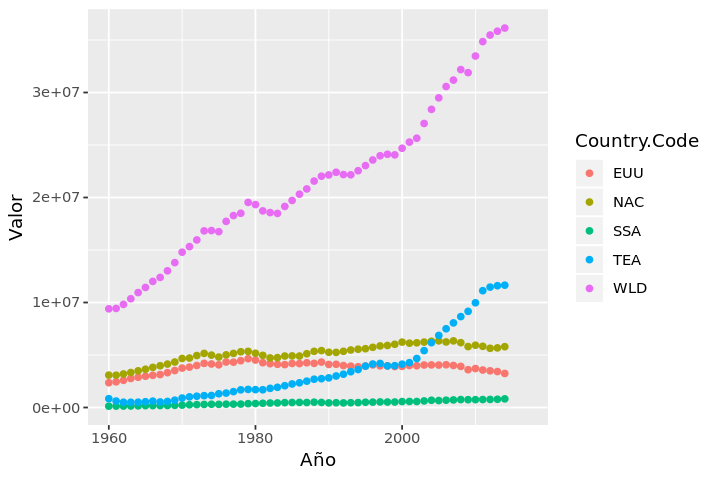

In [299]:
g <- ggplot(data=dfParaEmisiones,aes(x=anyo,y=value,color=Country.Code))+ geom_point()
g <- g + xlab("Año") + ylab("Valor")
g

Suponiendo que la tendencia se mantiene, es decir, que no se aplica ninguna política a nivel global de reducción de emisiones de CO2, ¿cual sería el total de emisiones de CO2 en todo el mundo en el año 2020?

Para calcularlo utiliza tres modelos lineales:
* Regresión lineal con polinomio grado 1
* Regresión lineal polinomio grado 3
* Regresión lineal polinomio grado 10

Represénta en una gráfica el valor real y el calculado por cada uno de los 3 modelos.

In [284]:
head(dfParaEmisiones)

Country.Name,Country.Code,variable,value,anyo
European Union,EUU,1960,2359594.9,1960
North America,NAC,1960,3083749.0,1960
Sub-Saharan Africa (excluding high income),SSA,1960,126081.5,1960
East Asia & Pacific (IDA & IBRD countries),TEA,1960,840235.7,1960
World,WLD,1960,9396705.8,1960
European Union,EUU,1961,2445945.7,1961


In [296]:
newdata <- subset(dfParaEmisiones, Country.Code == "WLD", select=c(anyo, value))
#añadimos filas hasta 2020 sin valor
newdata <- rbind(newdata, c(2018,NA))
newdata <- rbind(newdata, c(2019,NA))
newdata <- rbind(newdata, c(2020,NA))

,anyo,value
280,2015,NA
285,2016,NA
290,2017,NA
59,2018,NA
601,2019,NA
61,2020,NA


In [297]:
# generamos el modelo
model <- lm(data=newdata, formula= value ~ anyo)
summary(model)


Call:
lm(formula = value ~ anyo, data = newdata)

Residuals:
     Min       1Q   Median       3Q      Max 
-2645119  -799907   -95503  1108298  2964241 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -865517647   24718409  -35.02   <2e-16 ***
anyo            446334      12440   35.88   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1465000 on 53 degrees of freedom
  (6 observations deleted due to missingness)
Multiple R-squared:  0.9605,	Adjusted R-squared:  0.9597 
F-statistic:  1287 on 1 and 53 DF,  p-value: < 2.2e-16


Warning message:
“Removed 6 rows containing missing values (geom_point).”

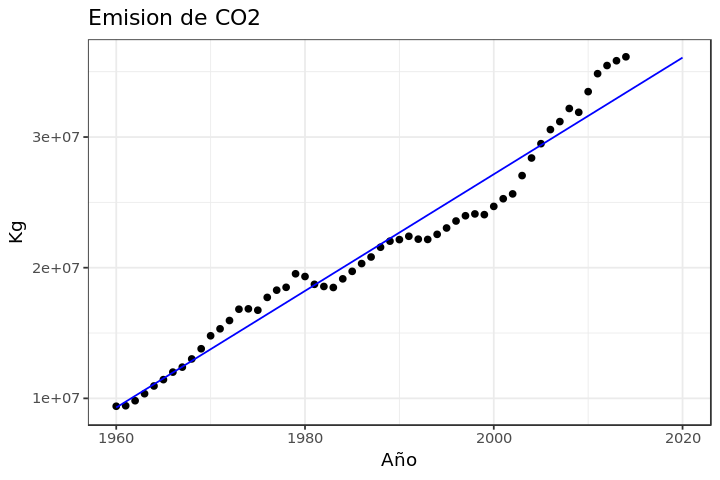

In [301]:
newdata$predicted <- predict(model, newdata)
ggplot(data=newdata,aes(x=anyo))+
   geom_point(aes(y=value))+
   geom_line(aes(y=predicted),color="blue")+
   theme_bw()+xlab("Año")+ylab("Kg")+ggtitle("Emision de CO2")

In [303]:
model10 <-lm(data=newdata ,value~anyo+I(anyo^2)+I(anyo^3)+I(anyo^4)+I(anyo^5)+I(anyo^6)+I(anyo^7)+I(anyo^8)+I(anyo^9)+I(anyo^10))
model3 <-lm(data=newdata ,value~anyo+I(anyo^2)+I(anyo^3))
newdata$predicted3 <- predict(model3, newdata)
newdata$predicted10 <- predict(model10, newdata)

Warning message in predict.lm(model10, newdata):
“prediction from a rank-deficient fit may be misleading”

Warning message:
“Removed 6 rows containing missing values (geom_point).”

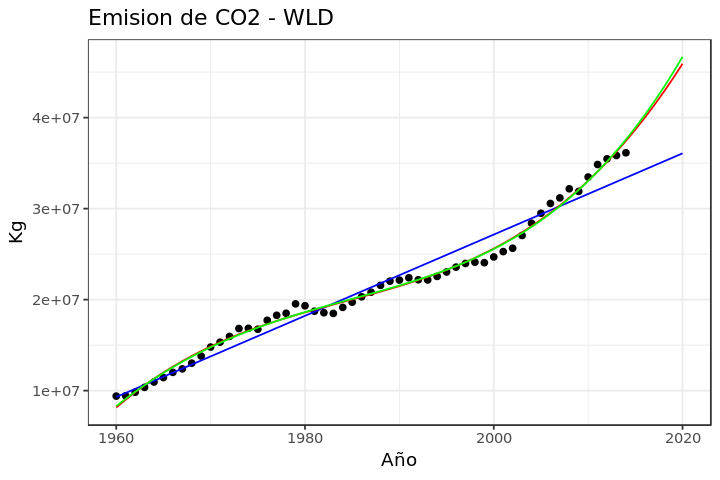

In [308]:
ggplot(data=newdata,aes(x=anyo))+
   geom_point(aes(y=value))+
   geom_line(aes(y=predicted),color="blue")+
   geom_line(aes(y=predicted3),color="red")+
   geom_line(aes(y=predicted10),color="green")+
   theme_bw()+xlab("Año")+ylab("Kg")+ggtitle("Emision de CO2 - WLD")

## Nivel de CO2

En esta parte vamos a trabajar con el nivel medio de CO2 medido por el NOAA en Manuna Loa (Hawai) desde 1968.

In [309]:
co2ppm<-read.csv("./datos/co2_mm_mlo.txt",skip=73,sep="",header = F, 
                 col.names= c("year","month","date","average","interpolated","trend","days"))

Representa el diagrama de dispersión entre:
* CO2 medido en la atmósfera (co2ppm\$interpolated)
* CO2 emitido por todos los países (databank con Indicator.Code=="EN.ATM.CO2E.KT" y Country.Code=="WLD"?

¿Cual es su correlación?


Nota: 

* Los valores en co2ppm vienen en meses, habrá que agregarlos, calcular la media anual a partir de los meses para así poder hacer la correlación con databank.
* Los valores en databank vienen en columnas, habrá que pasarlos a filas utilizando la función *melt*.

In [310]:
# Agregamos y calculamos el nivel de CO2 medio anual
yearlyco2ppm<-aggregate(interpolated ~ year, data = co2ppm, mean)


Calcular la matriz de correlación de las siguientes variables:
* Cantidad de CO2 en la atmósfera
* Emisiones totales CO2 en la atmósfera
* Temperatura mínima en praga (columna EMNT).

In [342]:
# en newdata esta la emision de CO2 de todos los paises (columna value)
# en yearlyCO2ppm esta el valor interpolado de la concentracion de co2 en la atmosfera (columna interpolated)
# en weatherPraga$EMNT esta la temperatura media

# Limpiamos los Dataframes

# Emisiones totales en Atmosfera
emisionDF <- subset(newdata, select=c(anyo, value))
colnames(emisionDF) <- c("YEAR", "EMISION")

# Concentracion
colnames(yearlyco2ppm) <- c("YEAR", "CONCENTRATION")

# tmin en Praga
tMinPragaDf <- subset(weatherPraga, select= c(DATE, EMNT))
colnames(tMinPragaDf) <- c("YEAR","TminPraga")



In [344]:
# Unimos todos los df en uno solo 
# hacemos un inner join para quitar todos los valores NA y facilitar la matriz de correlacion 
unido <- merge(emisionDF, yearlyco2ppm, by="YEAR")
unido <- merge(unido, tMinPragaDf, by="YEAR")
head(unido)

YEAR,EMISION,CONCENTRATION,TminPraga
1960,9396706,316.9075,-16.8
1961,9434403,317.6375,-16.7
1962,9818840,318.4508,-14.9
1963,10355747,318.9942,-17.4
1964,10947007,319.6175,-17.1
1965,11433442,320.0442,-9.8


In [339]:
matrizDeCorrelacion <- cor(unido[2:ncol(unido)])
matrizDeCorrelacion

,EMISION,CONCENTRATION,TminPraga
EMISION,1.0000000,0.9703198,0.2254552
CONCENTRATION,0.9703198,1.0000000,0.1783153
TminPraga,0.2254552,0.1783153,1.0000000


Vemos que la emisión y concentracion de CO2 estan muy correlacionadas (como cabria esperar), mientras que la temperatura mínima en Praga, si que está correlacionada pero de forma más leve. **Habría que estudiarlo**. 

Es posible que en otros valores, cómo la temperatura media o máxima viesemos más correlación.

In [347]:
#tavg en Praga
tAvgPragaDf <- subset(weatherPraga, select= c(DATE, TAVG, TMAX))
colnames(tAvgPragaDf) <- c("YEAR","TAVGPraga", "TMAXPraga")

#union
unidoConAVGyMAX <- merge(unido, tAvgPragaDf, by="YEAR")

matrizDeCorrelacionExtendida <- cor(unidoConAVGyMAX[2:ncol(unidoConAVGyMAX)])

matrizDeCorrelacionExtendida

,EMISION,CONCENTRATION,TminPraga,TAVGPraga,TMAXPraga
EMISION,1.0000000,0.9703198,0.2254552,0.5889358,0.5468906
CONCENTRATION,0.9703198,1.0000000,0.1783153,0.6127426,0.5917455
TminPraga,0.2254552,0.1783153,1.0000000,0.5164581,0.4434163
TAVGPraga,0.5889358,0.6127426,0.5164581,1.0000000,0.9801396
TMAXPraga,0.5468906,0.5917455,0.4434163,0.9801396,1.0000000


Y si, hay mas correlacion entre la Emision de CO2 y la Concentración con la temperatura Media y Máxima en Praga que con la temperatura media.

Pese a todo hay que tener en cuenta:

![](https://sparrowism.soc.srcf.net/home/piratesarecool4.gif)

Ya que una correlación entre dos factores no tiene porque implicar que uno de ellos cause el otro.